In [1]:
# Librarians:
import pandas as pd

# File Path At S3

In [2]:
s3_path = 's3://sagemaker-text-classifier-uci-news-aggregation/training_data/newsCorpora.csv'
df = pd.read_csv(s3_path, sep='\t', names=['ID', 'TITLE', 'URL',' PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [3]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


## Creating Lookup Dictionary to convert the category in more appropriate away

In [4]:
df.describe()

,ID,TIMESTAMP
count,422419.000000,4.224190e+05
mean,211536.764594,1.400445e+12
std,122102.839707,3.733088e+09
min,1.000000,1.394470e+12
25%,105801.500000,1.397349e+12
50%,211655.000000,1.399990e+12
75%,317273.500000,1.403775e+12
max,422937.000000,1.409229e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ID          422419 non-null  int64 
 1   TITLE       422419 non-null  object
 2   URL         422419 non-null  object
 3    PUBLISHER  422417 non-null  object
 4   CATEGORY    422419 non-null  object
 5   STORY       422419 non-null  object
 6   HOSTNAME    422419 non-null  object
 7   TIMESTAMP   422419 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [6]:
df.CATEGORY.unique()

array(['b', 't', 'e', 'm'], dtype=object)

In [7]:
df_work = df.copy()

In [8]:
df_work = df_work[['TITLE', 'CATEGORY']]

In [9]:
df_work


,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b
...,...,...
422414,Surgeons to remove 4-year-old's rib to rebuild...,m
422415,Boy to have surgery on esophagus after battery...,m
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m


In [10]:
my_dict = {

    'e': 'Entertainment',
    'b': 'Business',
    't': 'Science',
    'm': 'Health'
}    

In [11]:
def update_catagory(x):
    return my_dict[x]



In [12]:
# This calls the function ONLY if 'x' is in the dictionary.
# Otherwise, it skips the function call and keeps 'x' as is.
df_work['CATEGORY'] = df_work['CATEGORY'].apply(lambda x: update_catagory(x) if x in my_dict else x)

df_work.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",Business
1,Fed's Charles Plosser sees high bar for change...,Business
2,US open: Stocks fall after Fed official hints ...,Business
3,"Fed risks falling 'behind the curve', Charles ...",Business
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,Business


In [13]:
import random

def get_random_title_by_category(category):
    filter_df = df_work[df_work['CATEGORY']==category]
    return filter_df['TITLE'].sample().values[0]


category = 'Entertainment'
random_title = get_random_title_by_category(category)

print(random_title)

Eva Longoria Stuns On Cannes Film Festival Red Carpet... Again!


# Data Visualization

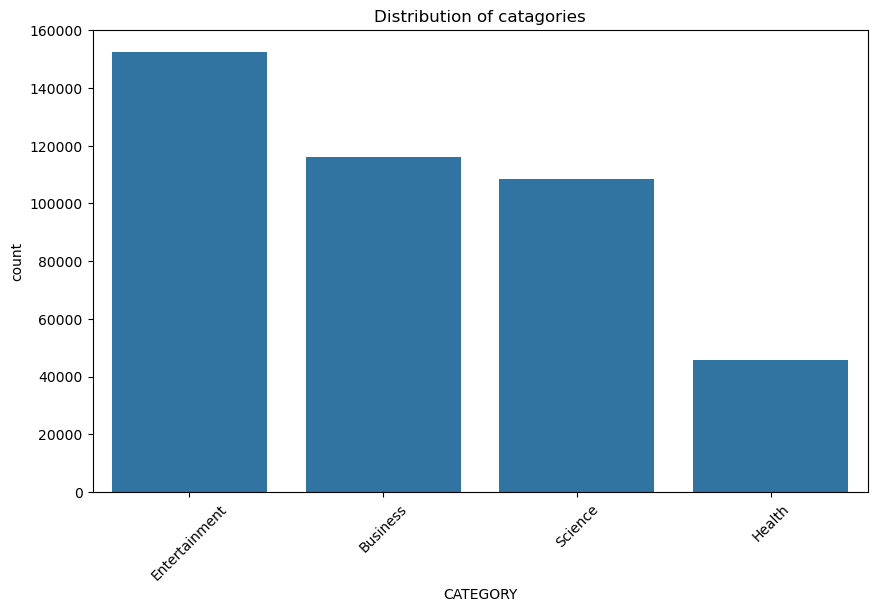

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

#barchart

plt.figure(figsize=(10,6))
sns.countplot(data=df_work, x='CATEGORY', order = df_work['CATEGORY'].value_counts().index)
#count all data rows look at catagorie colunm on df_work data and place it x axis, the order will sort the order by catagory colunm
#value count will count each catagorie and .index will extract the name of the catagorie
plt.title('Distribution of catagories')
plt.xticks(rotation = 45)
plt.show()

In [15]:
category_count = df_work['CATEGORY'].value_counts()
category_count

CATEGORY
Entertainment    152469
Business         115967
Science          108344
Health            45639
Name: count, dtype: int64

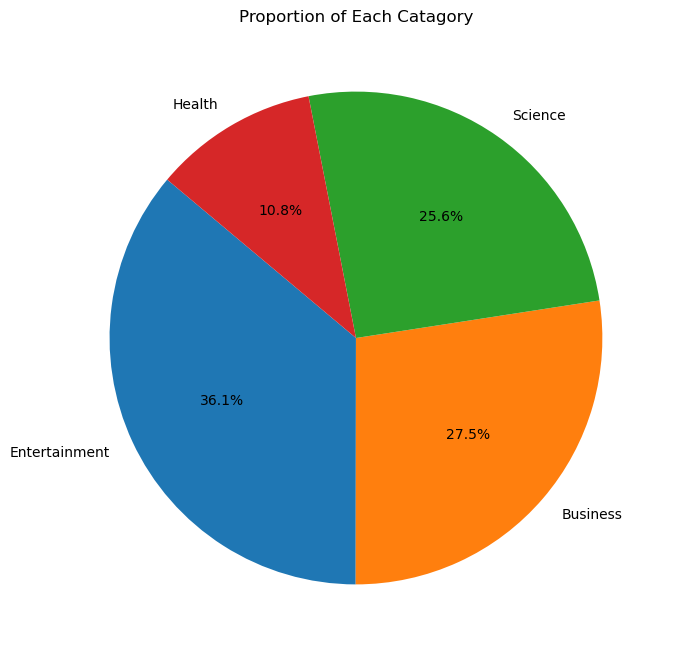

In [16]:
plt.figure(figsize= (8,8))
plt.pie(category_count,labels = category_count.index, autopct='%1.1f%%',startangle=140)
#first percent show the start of format string 1.1 indicate one decimal the second percent will add percent after each value
#third percent show close of format string, the 140 degree goes counter clockwise from 0 degree to look better
plt.title('Proportion of Each Catagory')
plt.show()


In [1]:
#to run final code must checck typo and mistake by run this in scropt.py file

!python -m py_compile script.py
#!python script.py --epoch 1 --learning_rate 1e-5 --train_batch_size 2 --valid_batch_size 2
